In [1]:
import sys
try:
    del sys.modules["spnhelp"]
except:
    pass
import spnhelp
try:
    del sys.modules["clg_revised"]
except:
    pass
from clg_revised import noise
from math import sqrt
from spn.io.Text import spn_to_str_equation
import pandas as pd
from spn.structure.leaves.parametric.Parametric import Gaussian, Uniform
import numpy as np
import matplotlib.pyplot as plt
from spn.algorithms.Marginalization import marginalize
from spn.algorithms.Inference import likelihood 
import scipy.stats as stats

[{A ~ N(0.0, 1.0), X ~ N(0.0, 1.0), G ~ N(0.0, 1.0)}]


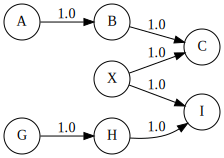

In [2]:

Z = "Z" @ (noise)
A = "A" @ (noise)
B = "B" @ (A + noise)
X = "X" @ (noise)
C = "C" @ (B + X + noise)

G = "G" @ (noise)
H = "H" @ (G + noise)
# X = "X" @ (noise)
I = "I" @ (H + X + noise)

# clg = CLG([A, X, Z, G])
# print(clg.get_Σ())
# clg.cluster_roots()

print(X.cluster_roots_by_dependence())
A.show_graph()

In [3]:
A.condition(0)
B.get_Σ()
# B.show_graph()

,A,X,G,B,H,C,I
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X,0.0,1.0,0.0,0.0,0.0,1.0,1.0
G,0.0,0.0,1.0,0.0,1.0,0.0,1.0
B,0.0,0.0,0.0,1.0,0.0,1.0,0.0
H,0.0,0.0,1.0,0.0,2.0,0.0,2.0
C,0.0,1.0,0.0,1.0,0.0,3.0,1.0
I,0.0,1.0,1.0,0.0,2.0,1.0,4.0


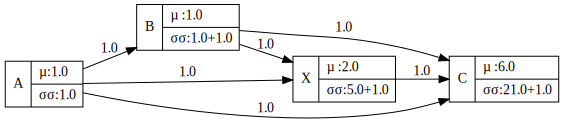

In [4]:
A = "A" @ (noise + 1)
B = "B" @ (A + noise)
X = "X" @ (A + B + noise)
C = "C" @ (A + B + X + noise)
A.show_graph(True)

     P2   P0   X    A    B    C     D     E      Y      Z 
P2  1.0  0.0  1.0 -1.0 -1.0 -1.0 -0.10 -0.10   0.70   0.70
P0  0.0  1.0  0.0  1.0  1.0  2.0  0.20  0.20   0.60   0.60
X   1.0  0.0  1.0 -1.0 -1.0 -1.0 -0.10 -0.10   0.70   0.70
A  -1.0  1.0 -1.0  2.0  2.0  3.0  0.30  0.30  -0.10  -0.10
B  -1.0  1.0 -1.0  2.0  2.0  3.0  0.30  0.30  -0.10  -0.10
C  -1.0  2.0 -1.0  3.0  3.0  5.0  0.50  0.50   0.50   0.50
D  -0.1  0.2 -0.1  0.3  0.3  0.5  1.05  1.05   3.05   3.05
E  -0.1  0.2 -0.1  0.3  0.3  0.5  1.05  2.05   3.05   3.05
Y   0.7  0.6  0.7 -0.1 -0.1  0.5  3.05  3.05  10.85  10.85
Z   0.7  0.6  0.7 -0.1 -0.1  0.5  3.05  3.05  10.85  10.85


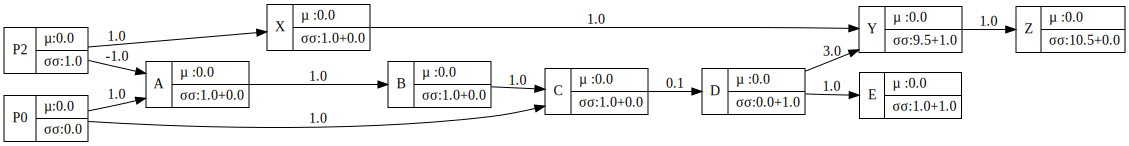

In [5]:
P0 = "P0" @ (noise)
P1 = "P1" @ (noise) 
P2 = "P2" @ (noise)
A = "A " @ (P0 - P2)
X = "X " @ (P2)
B = "B " @ (A)
C = "C " @ (B + P0)
D = "D " @ (0.1*C + noise)
E = "E " @ (D + noise)
Y = "Y " @ (X + 3*D + noise)
Z = "Z " @ (Y)

A.get_Σ()
for _ in range(10):
    P0.condition(0)
    A.get_Σ()
print(A.get_Σ())
A.show_graph(True)